# utils_os.py

In [1]:
import os

In [2]:
root, dirs, files = os.walk('../').__next__()

In [3]:
print(root, end='\n---\n')
print(dirs, end='\n---\n')
print(files, end='\n---\n')

../
---
['labs-python', '.ipynb_checkpoints', 'labs-neural-networks', '.git', 'kaggle', '.idea', 'labs-AI', 'labs-machine-learning']
---
['start-jupyter.bat', 'README.md', 'LICENSE', '.gitignore']
---


In [4]:
lst = list(filter(None, map(lambda x: x if x.startswith('.') else None, files)))
lst

['.gitignore']

# utils_graph.py

In [28]:
from utils_graph import * # jp_display_color_palette
import utils_graph

In [29]:
#dir(utils_graph)
utils_graph.jp_display_color_pallete()

# utils_pandas.py

In [34]:

keep_this = """
Feature 1
Feature 2  
"""


def feature_lst(lst=keep_this):
	return list(map(lambda x: x.strip(), filter(None, lst.split('\n'))))
feature_lst()

['Feature 1', 'Feature 2']

# utils_plotly.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
import plotly.offline as py
import plotly.graph_objs as go

import plotly.figure_factory as ff
import plotly.tools as tls

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
from utils_graph import color_blind_10

In [4]:
df = pd.DataFrame(data={
    'A': [1, 3, 5, 6, 7, 3, 3, 5, 1, 3]
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
A    10 non-null int64
dtypes: int64(1)
memory usage: 160.0 bytes


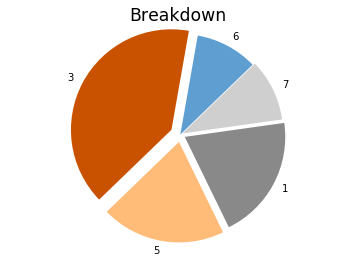

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

vc_subset = df.A.value_counts().head(5)
explode = np.arange(0, 1, 1/len(vc_subset))[::-1]
explode = [x / 8 for x in explode]
ax.pie(vc_subset, labels=vc_subset.index, radius=1, explode=explode, colors=color_blind_10.values(), startangle=80)

ax.axis('equal')
ax.margins(0)
# fig.rcParams.update({'font.size': 10})

ax.set_title('Breakdown', fontsize='xx-large')

plt.show()

In [6]:
# converting to plotly figure object not possible for piecharts because of wedges objects
plotly_fig = tls.mpl_to_plotly(fig)

# pp = pprint.PrettyPrinter(indent=4)
# pp.pprint(plotly_fig['layout'])

py.iplot(plotly_fig)

/usr/local/lib/python3.5/dist-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



PlotlyEmptyDataError: Empty data list found. Make sure that you populated the list of data objects you're sending and try again.
Questions? Visit support.plot.ly

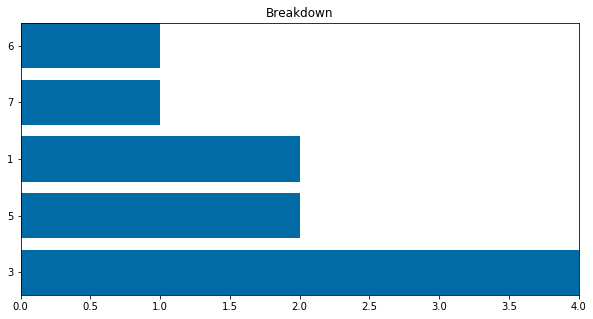

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.barh(
	range(1, len(vc_subset) + 1),
	vc_subset.values,
	tick_label=vc_subset.index,
	color=color_blind_10['cb_blue_1'],
	# width=2,
	# align='edge'
)

# ax.axis('equal')
ax.margins(0)
# fig.rcParams.update({'font.size': 10})

ax.set_title('Breakdown')

# plt.xlim(0,9)
plt.show()

In [8]:

plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig['layout']['margin']['b'] = 30
plotly_fig['layout']['xaxis1']['range'] = [0, 4]
plotly_fig['layout']['yaxis1']['ticktext'] = vc_subset.index
plotly_fig['layout']['yaxis1']['tickvals'] = list(range(1, len(vc_subset) + 1))

py.iplot(plotly_fig)
